In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
dataset.drop(labels=['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [28]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


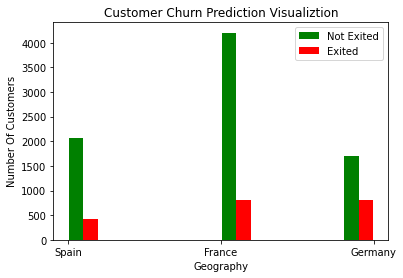

In [30]:
geography_churn_no = dataset[dataset.Exited==0].Geography
geography_churn_yes = dataset[dataset.Exited==1].Geography

plt.xlabel("Geography")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([geography_churn_no, geography_churn_yes], rwidth=0.95, color=['green','red'],label=['Not Exited','Exited'])
plt.legend()

In [31]:
def print_unique_col_values(df):
       for column in df.columns:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [32]:
print_unique_col_values(dataset)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [33]:
df=pd.get_dummies(data=dataset, columns=['Geography','Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [34]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [35]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [36]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [38]:
X_train.shape

(8000, 13)

In [39]:
y_train.shape

(8000,)

In [40]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.4850 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.8045
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.8180
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4178 - accuracy: 0.8271
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8301
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8336
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3909 - accuracy: 0.8395
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8491
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8514
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3509 - accura

In [41]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [42]:
y_pred[:5]

array([[0.01341839],
       [0.04297281],
       [0.02901534],
       [0.08765467],
       [0.02936721]], dtype=float32)

In [43]:
y_pred_final = []
for element in y_pred:
    if element > 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [44]:
y_pred_final[:5]

[0, 0, 0, 0, 0]

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1595
           1       0.60      0.44      0.50       405

    accuracy                           0.83      2000
   macro avg       0.73      0.68      0.70      2000
weighted avg       0.81      0.83      0.82      2000



# **Trying again with balancing**

In [46]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(X,y)

In [48]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5)

In [50]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_sm, y_train_sm, epochs=100)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6318 - accuracy: 0.6404
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5303 - accuracy: 0.7297
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7593
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4740 - accuracy: 0.7647
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.7717
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.7746
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.7799
Epoch 8/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4445 - accuracy: 0.7843
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4410 - accuracy: 0.7860
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4357 - accura

In [51]:
y_pred_sm = model.predict(X_test_sm)

100/100 [==============================] - 0s 1ms/step


In [52]:
y_pred_sm_final = []
for element in y_pred_sm:
    if element > 0.5:
        y_pred_sm_final.append(1)
    else:
        y_pred_sm_final.append(0)

In [53]:
print(classification_report(y_test_sm,y_pred_sm_final))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1591
           1       0.84      0.84      0.84      1595

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

